# Script acquire images from PSRD at Aramis, SwissFEL, images saved as h5
- General documentation 
- User guide ADD WEBSITE\
- Comments to christopher.arrell@psi.ch

In [53]:
import matplotlib.pyplot as plt
import epics as ep
from datetime import date
import h5py as h5

## User inputs

In [64]:
basePV = 'SAROP21-PSRD103:'
imagePV = basePV+'FPICTURE'
widthPV = basePV+'WIDTH'
heightPV = basePV+'HEIGHT'
MCP_HVPV = 'SAROP21-PSRD103:V-CH0'
Screen_HVPV = 'SAROP21-PSRD103:V-CH1'
Datafn = 'after_change2'
Figfn = 'after_change2'

## Acquire and display

In [62]:
width = int(ep.caget(widthPV))
height = int(ep.caget(heightPV))
img = ep.caget(imagePV).reshape((height,width))
MCP_HV = ep.caget(MCP_HVPV)
Screen_HV = ep.caget(Screen_HVPV)
today = date.today()

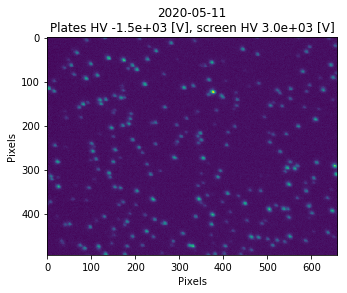

In [63]:
plt.figure()
plt.title(str(today) +'\nPlates HV %.1e [V], screen HV %.1e [V]'%(MCP_HV, Screen_HV))
plt.imshow(img)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.savefig("after change2", dpi = 300)

## Save

In [65]:
SaveFn = Datafn+'.h5'
with h5.File(SaveFn,'w-') as fh:
    fh['img'] = img
    fh['width'] = width
    fh['height'] = height
    fh['MCP_HV'] = MCP_HV
    fh['Screen_HV'] = Screen_HV    